In [1]:
# import packages
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt
import math

# import spisea packages
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity

# import nbody6tools reader to read data
from nbody6tools import Reader

# import nbody62spisea to retrieve star ages
from nbody62spisea import converter

# colormap stuff for gradient plotting
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

/home/wyz5rge/.local/lib/python3.9/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /scratch/wyz5rge/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


In [2]:
# define isochrone parameters
AKs = 0
dist = 410
evo_model = evolution.Baraffe15()
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()
metallicity = 0

filt_list = ['jwst,F115W', 'jwst,F200W']
filters = ['m_jwst_F115W', 'm_jwst_F200W']
filter_zero_points = [3.9204e-10, 5.74349e-11]
# filter_zero_points = [3.9204e-17, 5.74349e-18]

iso_dir = 'isochrones/'


In [3]:
# Create age arrays
level_age_arr = [1.5e6, 2.0e6]
log_age_arr = np.log10(level_age_arr)

print(log_age_arr)
print(level_age_arr)

[6.17609126 6.30103   ]
[1500000.0, 2000000.0]


In [4]:
# create isochrone grid - if this is the first time, then this is going to take an hour lmfao
instances = np.empty(len(log_age_arr), dtype=object)

for i in range(len(log_age_arr)):
    my_iso = synthetic.IsochronePhot(log_age_arr[i], AKs, dist, metallicity=metallicity,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list,
                                iso_dir=iso_dir)
    instances[i] = my_iso
        
print("isochrone generation done")

isochrone generation done


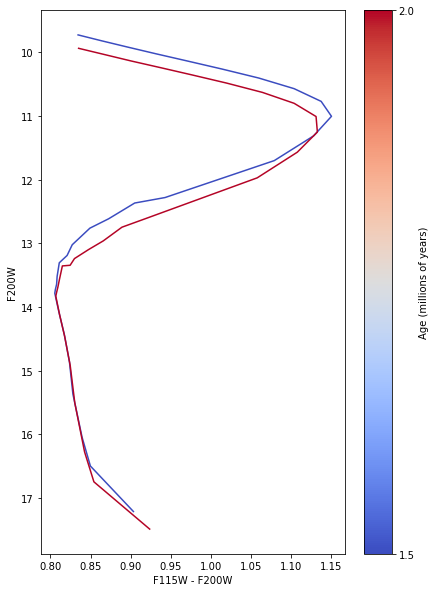

In [5]:
# Plot CMD
fig, axes = py.subplots(figsize=(15, 10))
py.subplot(1, 2, 1)

# Define a colormap
cmap = plt.get_cmap('coolwarm')  # You can choose any colormap you prefer

for i in range(len(log_age_arr)):
    color = cmap(i / (len(log_age_arr) - 1))  # Assign color based on index and colormap
    py.plot(instances[i].points[filters[0]] - instances[i].points[filters[1]], 
           instances[i].points[filters[1]], color=color, label='')
    
py.xlabel('F115W - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()

# Create colorbar legend
norm = Normalize(vmin=min(level_age_arr), vmax=max(level_age_arr))
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Age (millions of years)')
cbar.set_ticks(level_age_arr)
cbar.set_ticklabels([f'{age/1e6:.1f}' for age in level_age_arr])

plt.show()

In [6]:
mass = 1.0
level_age = 1.6e6
log_age = np.log10(level_age)
level_age_myr = level_age / 1e6

In [7]:
import os
import sys
os.chdir('/scratch/wyz5rge/synthetic-hr/2024/06-10/')
sys.path.append('/scratch/wyz5rge/synthetic-hr/2024/06-10/')

import interpolator_old as interpolator_old
import interpolator_exp as interpolator_exp

In [8]:
star_old = interpolator_old.interpolate(level_age_myr, mass, instances, log_age_arr, filters)
star_exp = interpolator_exp.interpolate(level_age_myr, mass, instances, log_age_arr, filters, filter_zero_points)

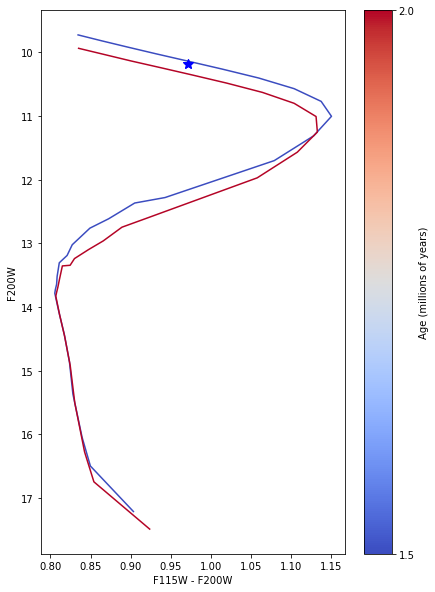

In [9]:
# Plot CMD
fig, axes = py.subplots(figsize=(15, 10))
py.subplot(1, 2, 1)

# Define a colormap
cmap = plt.get_cmap('coolwarm')  # You can choose any colormap you prefer

for i in range(len(log_age_arr)):
    color = cmap(i / (len(log_age_arr) - 1))  # Assign color based on index and colormap
    py.plot(instances[i].points[filters[0]] - instances[i].points[filters[1]], 
           instances[i].points[filters[1]], color=color, label='')
    
py.xlabel('F115W - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()

# Create colorbar legend
norm = Normalize(vmin=min(level_age_arr), vmax=max(level_age_arr))
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Age (millions of years)')
cbar.set_ticks(level_age_arr)
cbar.set_ticklabels([f'{age/1e6:.1f}' for age in level_age_arr])

py.plot(star_old[3]-star_old[4], star_old[4], marker='*', color='b', markersize=10)
py.plot(star_exp[3]-star_exp[4], star_exp[4], marker='*', color='b', markersize=10)

In [89]:
iso1p6 = synthetic.IsochronePhot(np.log10(1.6e6), AKs, dist, metallicity=metallicity,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list,
                                iso_dir=iso_dir)

  mass 
solMass
-------
   0.01
  0.015
   0.02
    ...
    1.1
    1.2
    1.3
    1.4
Length = 30 rows


In [90]:
for i in range(len(iso1p6.points['mass'])):
    print(iso1p6.points['mass'][i])

0.01
0.015
0.02
0.03
0.04
0.05
0.06
0.07
0.072
0.075
0.08
0.09
0.1
0.11
0.13
0.15
0.17
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
1.1
1.2
1.3
1.4


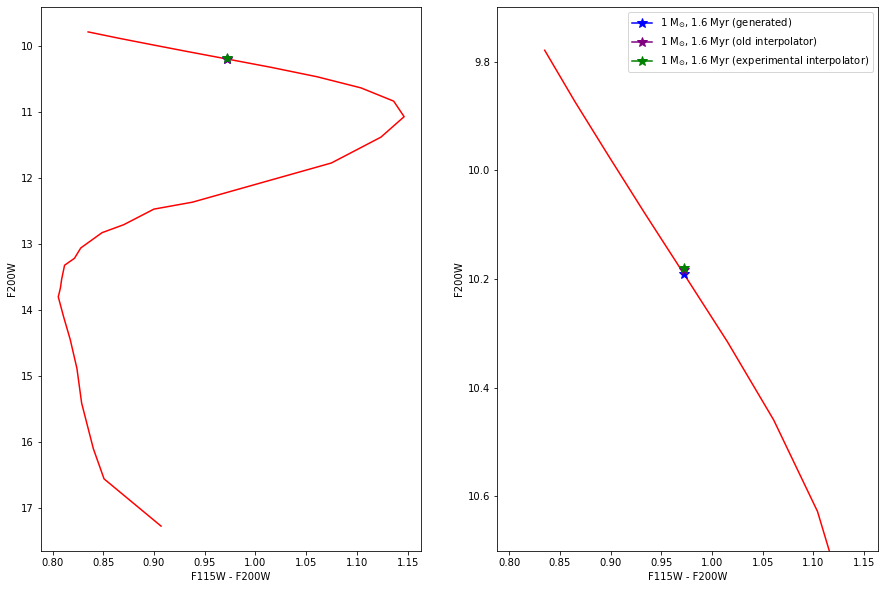

In [27]:
fig, axes = py.subplots(figsize=(15, 10))

py.subplot(1, 2, 1)
py.plot(iso1p6.points[filters[0]] - iso1p6.points[filters[1]], iso1p6.points[filters[1]], color='red')

idx = np.where( abs(iso1p6.points['mass'] - 1.0) == min(abs(iso1p6.points['mass'] - 1.0)) )[0]
py.plot(iso1p6.points[idx][filters[0]] - iso1p6.points[idx][filters[1]], iso1p6.points[idx][filters[1]], marker="*",
       color="b", markersize=10, label="1 M$_{\odot}$, 1.6 Myr (generated)")

py.plot(star_old[3]-star_old[4], star_old[4], marker='*', color='purple', 
        markersize=10, label='1 M$_{\odot}$, 1.6 Myr (old interpolator)')
py.plot(star_exp[3]-star_exp[4], star_exp[4], marker='*', color='g', 
        markersize=10, label='1 M$_{\odot}$, 1.6 Myr (experimental interpolator)')

py.xlabel('F115W - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()

# ============================================

py.subplot(1, 2, 2)
py.plot(iso1p6.points[filters[0]] - iso1p6.points[filters[1]], iso1p6.points[filters[1]], color='red')

idx = np.where( abs(iso1p6.points['mass'] - 1.0) == min(abs(iso1p6.points['mass'] - 1.0)) )[0]
py.plot(iso1p6.points[idx][filters[0]] - iso1p6.points[idx][filters[1]], iso1p6.points[idx][filters[1]], marker="*",
       color="b", markersize=10, label="1 M$_{\odot}$, 1.6 Myr (generated)")

py.plot(star_old[3]-star_old[4], star_old[4], marker='*', color='purple', 
        markersize=10, label='1 M$_{\odot}$, 1.6 Myr (old interpolator)')
py.plot(star_exp[3]-star_exp[4], star_exp[4], marker='*', color='g', 
        markersize=10, label='1 M$_{\odot}$, 1.6 Myr (experimental interpolator)')

py.ylim(9.7, 10.7)

py.xlabel('F115W - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()

py.legend()

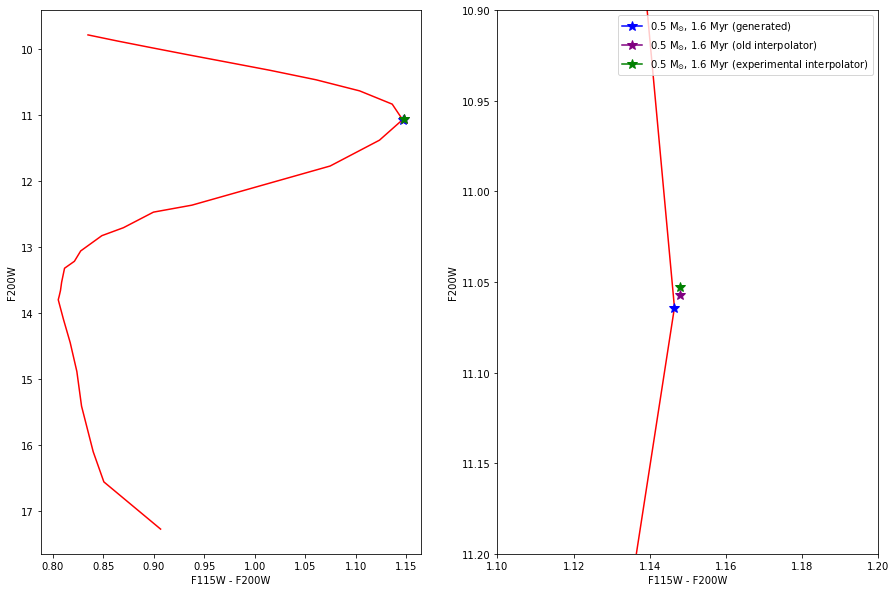

In [29]:
mass = 0.5
level_age = 1.6e6
log_age = np.log10(level_age)
level_age_myr = level_age / 1e6

star_old_m0p5 = interpolator_old.interpolate(level_age_myr, mass, instances, log_age_arr, filters)
star_exp_m0p5 = interpolator_exp.interpolate(level_age_myr, mass, instances, log_age_arr, filters, filter_zero_points)

fig, axes = py.subplots(figsize=(15, 10))

py.subplot(1, 2, 1)
py.plot(iso1p6.points[filters[0]] - iso1p6.points[filters[1]], iso1p6.points[filters[1]], color='red')

idx = np.where( abs(iso1p6.points['mass'] - 0.5) == min(abs(iso1p6.points['mass'] - 0.5)) )[0]
py.plot(iso1p6.points[idx][filters[0]] - iso1p6.points[idx][filters[1]], iso1p6.points[idx][filters[1]], marker="*",
       color="b", markersize=10, label="0.5 M$_{\odot}$, 1.6 Myr (generated)")

py.plot(star_old_m0p5[3]-star_old_m0p5[4], star_old_m0p5[4], marker='*', color='purple', 
        markersize=10, label='0.5 M$_{\odot}$, 1.6 Myr (old interpolator)')
py.plot(star_exp_m0p5[3]-star_exp_m0p5[4], star_exp_m0p5[4], marker='*', color='g', 
        markersize=10, label='0.5 M$_{\odot}$, 1.6 Myr (experimental interpolator)')

py.xlabel('F115W - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()

py.subplot(1, 2, 2)
py.plot(iso1p6.points[filters[0]] - iso1p6.points[filters[1]], iso1p6.points[filters[1]], color='red')

idx = np.where( abs(iso1p6.points['mass'] - 0.5) == min(abs(iso1p6.points['mass'] - 0.5)) )[0]
py.plot(iso1p6.points[idx][filters[0]] - iso1p6.points[idx][filters[1]], iso1p6.points[idx][filters[1]], marker="*",
       color="b", markersize=10, label="0.5 M$_{\odot}$, 1.6 Myr (generated)")

py.plot(star_old_m0p5[3]-star_old_m0p5[4], star_old_m0p5[4], marker='*', color='purple', 
        markersize=10, label='0.5 M$_{\odot}$, 1.6 Myr (old interpolator)')
py.plot(star_exp_m0p5[3]-star_exp_m0p5[4], star_exp_m0p5[4], marker='*', color='g', 
        markersize=10, label='0.5 M$_{\odot}$, 1.6 Myr (experimental interpolator)')

py.xlim(1.10, 1.20)
py.ylim(10.9, 11.2)

py.xlabel('F115W - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()

py.legend()

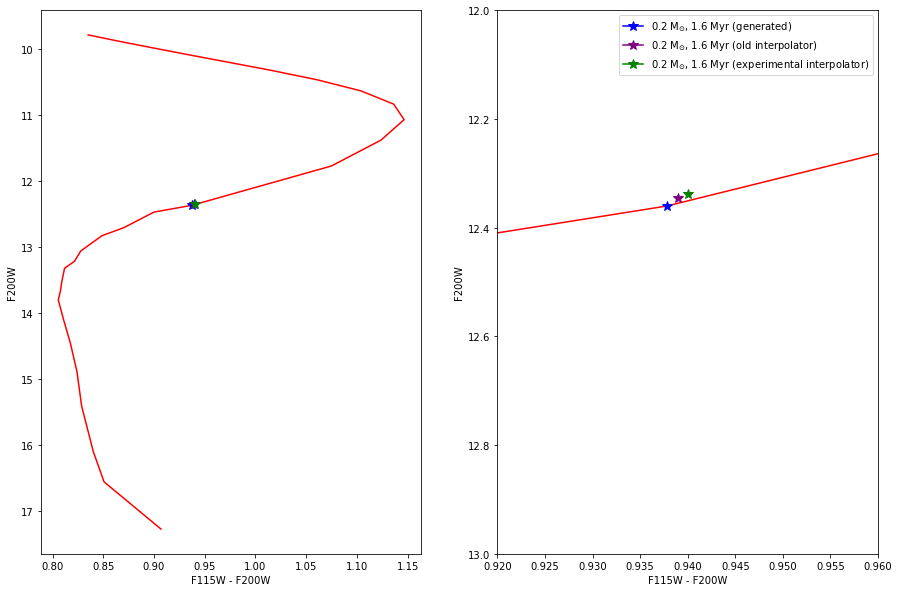

In [59]:
mass = 0.2
level_age = 1.6e6
log_age = np.log10(level_age)
level_age_myr = level_age / 1e6

star_old_m0p2 = interpolator_old.interpolate(level_age_myr, mass, instances, log_age_arr, filters)
star_exp_m0p2 = interpolator_exp.interpolate(level_age_myr, mass, instances, log_age_arr, filters, filter_zero_points)

fig, axes = py.subplots(figsize=(15, 10))

py.subplot(1, 2, 1)
py.plot(iso1p6.points[filters[0]] - iso1p6.points[filters[1]], iso1p6.points[filters[1]], color='red')

idx = np.where( abs(iso1p6.points['mass'] - 0.2) == min(abs(iso1p6.points['mass'] - 0.2)) )[0]
py.plot(iso1p6.points[idx][filters[0]] - iso1p6.points[idx][filters[1]], iso1p6.points[idx][filters[1]], marker="*",
       color="b", markersize=10, label="0.2 M$_{\odot}$, 1.6 Myr (generated)")

py.plot(star_old_m0p2[3]-star_old_m0p2[4], star_old_m0p2[4], marker='*', color='purple', 
        markersize=10, label='0.2 M$_{\odot}$, 1.6 Myr (old interpolator)')
py.plot(star_exp_m0p2[3]-star_exp_m0p2[4], star_exp_m0p2[4], marker='*', color='g', 
        markersize=10, label='0.2 M$_{\odot}$, 1.6 Myr (experimental interpolator)')

py.xlabel('F115W - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()

py.subplot(1, 2, 2)
py.plot(iso1p6.points[filters[0]] - iso1p6.points[filters[1]], iso1p6.points[filters[1]], color='red')

idx = np.where( abs(iso1p6.points['mass'] - 0.2) == min(abs(iso1p6.points['mass'] - 0.2)) )[0]
py.plot(iso1p6.points[idx][filters[0]] - iso1p6.points[idx][filters[1]], iso1p6.points[idx][filters[1]], marker="*",
       color="b", markersize=10, label="0.2 M$_{\odot}$, 1.6 Myr (generated)")

py.plot(star_old_m0p2[3]-star_old_m0p2[4], star_old_m0p2[4], marker='*', color='purple', 
        markersize=10, label='0.2 M$_{\odot}$, 1.6 Myr (old interpolator)')
py.plot(star_exp_m0p2[3]-star_exp_m0p2[4], star_exp_m0p2[4], marker='*', color='g', 
        markersize=10, label='0.2 M$_{\odot}$, 1.6 Myr (experimental interpolator)')

py.xlabel('F115W - F200W')
py.ylabel('F200W')

py.xlim(0.92, 0.96)
py.ylim(12, 13)
py.gca().invert_yaxis()

py.legend()

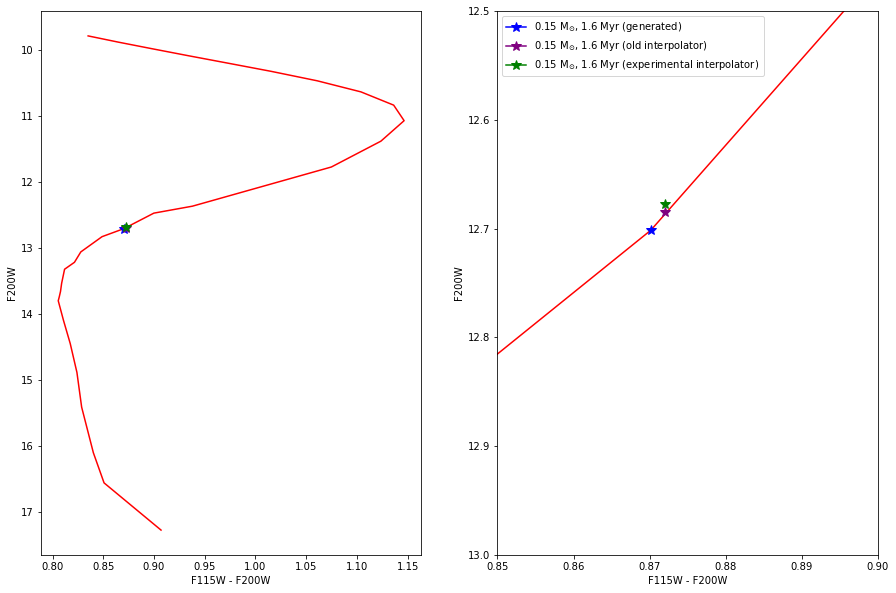

In [85]:
mass = 0.15
level_age = 1.6e6
log_age = np.log10(level_age)
level_age_myr = level_age / 1e6

star_old_m0p15 = interpolator_old.interpolate(level_age_myr, mass, instances, log_age_arr, filters)
star_exp_m0p15 = interpolator_exp.interpolate(level_age_myr, mass, instances, log_age_arr, filters, filter_zero_points)

fig, axes = py.subplots(figsize=(15, 10))

py.subplot(1, 2, 1)
py.plot(iso1p6.points[filters[0]] - iso1p6.points[filters[1]], iso1p6.points[filters[1]], color='red')

idx = np.where( abs(iso1p6.points['mass'] - 0.15) == min(abs(iso1p6.points['mass'] - 0.15)) )[0]
py.plot(iso1p6.points[idx][filters[0]] - iso1p6.points[idx][filters[1]], iso1p6.points[idx][filters[1]], marker="*",
       color="b", markersize=10, label="0.15 M$_{\odot}$, 1.6 Myr (generated)")

py.plot(star_old_m0p15[3]-star_old_m0p15[4], star_old_m0p15[4], marker='*', color='purple', 
        markersize=10, label='0.15 M$_{\odot}$, 1.6 Myr (old interpolator)')
py.plot(star_exp_m0p15[3]-star_exp_m0p15[4], star_exp_m0p15[4], marker='*', color='g', 
        markersize=10, label='0.15 M$_{\odot}$, 1.6 Myr (experimental interpolator)')

py.xlabel('F115W - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()

py.subplot(1, 2, 2)
py.plot(iso1p6.points[filters[0]] - iso1p6.points[filters[1]], iso1p6.points[filters[1]], color='red')

idx = np.where( abs(iso1p6.points['mass'] - 0.15) == min(abs(iso1p6.points['mass'] - 0.15)) )[0]
py.plot(iso1p6.points[idx][filters[0]] - iso1p6.points[idx][filters[1]], iso1p6.points[idx][filters[1]], marker="*",
       color="b", markersize=10, label="0.15 M$_{\odot}$, 1.6 Myr (generated)")

py.plot(star_old_m0p15[3]-star_old_m0p15[4], star_old_m0p15[4], marker='*', color='purple', 
        markersize=10, label='0.15 M$_{\odot}$, 1.6 Myr (old interpolator)')
py.plot(star_exp_m0p15[3]-star_exp_m0p15[4], star_exp_m0p15[4], marker='*', color='g', 
        markersize=10, label='0.15 M$_{\odot}$, 1.6 Myr (experimental interpolator)')

py.xlabel('F115W - F200W')
py.ylabel('F200W')

py.xlim(0.85, 0.90)
py.ylim(12.5, 13)
py.gca().invert_yaxis()

py.legend()

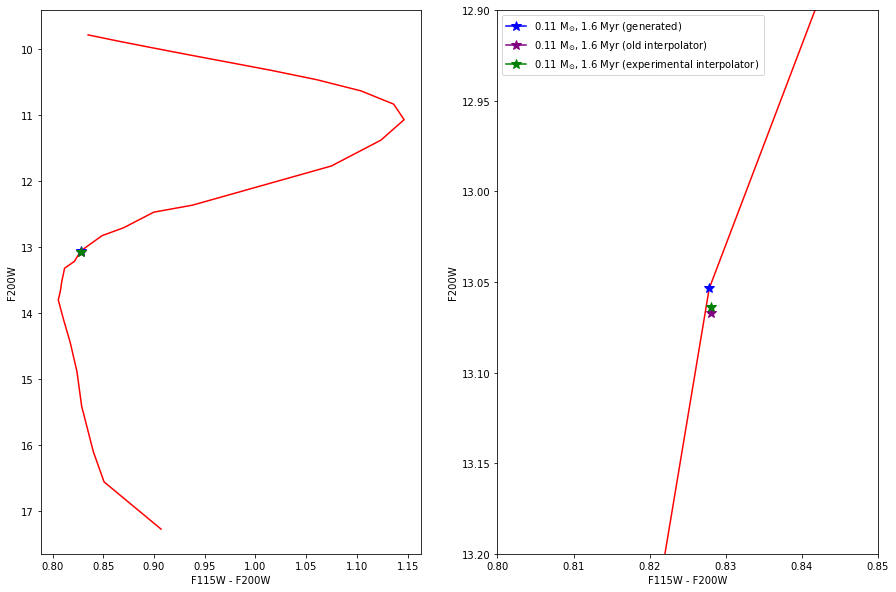

In [98]:
mass = 0.11
level_age = 1.6e6
log_age = np.log10(level_age)
level_age_myr = level_age / 1e6

star_old_m0p11 = interpolator_old.interpolate(level_age_myr, mass, instances, log_age_arr, filters)
star_exp_m0p11 = interpolator_exp.interpolate(level_age_myr, mass, instances, log_age_arr, filters, filter_zero_points)

fig, axes = py.subplots(figsize=(15, 10))

py.subplot(1, 2, 1)
py.plot(iso1p6.points[filters[0]] - iso1p6.points[filters[1]], iso1p6.points[filters[1]], color='red')

idx = np.where( abs(iso1p6.points['mass'] - 0.11) == min(abs(iso1p6.points['mass'] - 0.11)) )[0]
py.plot(iso1p6.points[idx][filters[0]] - iso1p6.points[idx][filters[1]], iso1p6.points[idx][filters[1]], marker="*",
       color="b", markersize=10, label="0.11 M$_{\odot}$, 1.6 Myr (generated)")

py.plot(star_old_m0p11[3]-star_old_m0p11[4], star_old_m0p11[4], marker='*', color='purple', 
        markersize=10, label='0.11 M$_{\odot}$, 1.6 Myr (old interpolator)')
py.plot(star_exp_m0p11[3]-star_exp_m0p11[4], star_exp_m0p11[4], marker='*', color='g', 
        markersize=10, label='0.11 M$_{\odot}$, 1.6 Myr (experimental interpolator)')

py.xlabel('F115W - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()

py.subplot(1, 2, 2)
py.plot(iso1p6.points[filters[0]] - iso1p6.points[filters[1]], iso1p6.points[filters[1]], color='red')

idx = np.where( abs(iso1p6.points['mass'] - 0.11) == min(abs(iso1p6.points['mass'] - 0.11)) )[0]
py.plot(iso1p6.points[idx][filters[0]] - iso1p6.points[idx][filters[1]], iso1p6.points[idx][filters[1]], marker="*",
       color="b", markersize=10, label="0.11 M$_{\odot}$, 1.6 Myr (generated)")

py.plot(star_old_m0p11[3]-star_old_m0p11[4], star_old_m0p11[4], marker='*', color='purple', 
        markersize=10, label='0.11 M$_{\odot}$, 1.6 Myr (old interpolator)')
py.plot(star_exp_m0p11[3]-star_exp_m0p11[4], star_exp_m0p11[4], marker='*', color='g', 
        markersize=10, label='0.11 M$_{\odot}$, 1.6 Myr (experimental interpolator)')

py.xlabel('F115W - F200W')
py.ylabel('F200W')

py.xlim(0.8, 0.85)
py.ylim(12.9, 13.2)
py.gca().invert_yaxis()

py.legend()

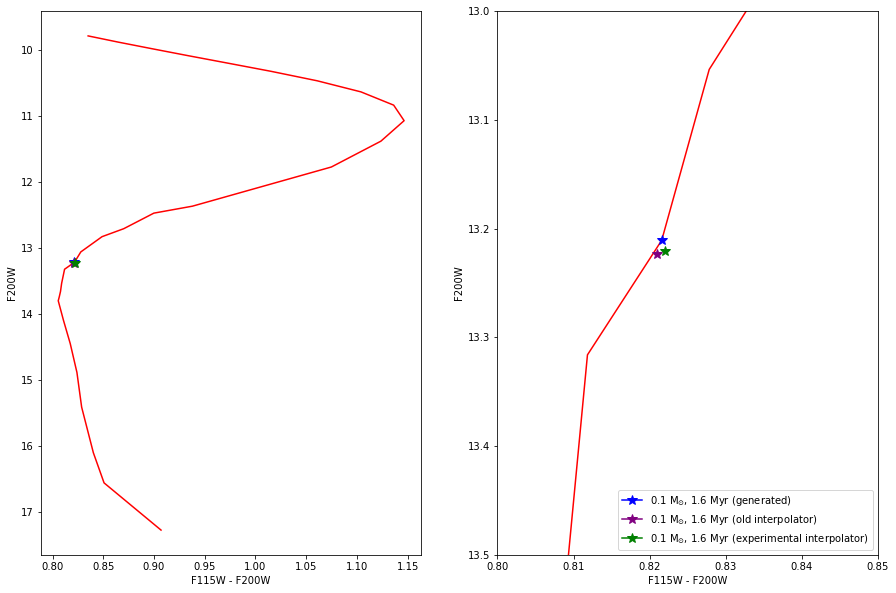

In [93]:
mass = 0.1
level_age = 1.6e6
log_age = np.log10(level_age)
level_age_myr = level_age / 1e6

star_old_m0p1 = interpolator_old.interpolate(level_age_myr, mass, instances, log_age_arr, filters)
star_exp_m0p1 = interpolator_exp.interpolate(level_age_myr, mass, instances, log_age_arr, filters, filter_zero_points)

fig, axes = py.subplots(figsize=(15, 10))

py.subplot(1, 2, 1)
py.plot(iso1p6.points[filters[0]] - iso1p6.points[filters[1]], iso1p6.points[filters[1]], color='red')

idx = np.where( abs(iso1p6.points['mass'] - 0.1) == min(abs(iso1p6.points['mass'] - 0.1)) )[0]
py.plot(iso1p6.points[idx][filters[0]] - iso1p6.points[idx][filters[1]], iso1p6.points[idx][filters[1]], marker="*",
       color="b", markersize=10, label="0.1 M$_{\odot}$, 1.6 Myr (generated)")

py.plot(star_old_m0p1[3]-star_old_m0p1[4], star_old_m0p1[4], marker='*', color='purple', 
        markersize=10, label='0.1 M$_{\odot}$, 1.6 Myr (old interpolator)')
py.plot(star_exp_m0p1[3]-star_exp_m0p1[4], star_exp_m0p1[4], marker='*', color='g', 
        markersize=10, label='0.1 M$_{\odot}$, 1.6 Myr (experimental interpolator)')

py.xlabel('F115W - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()

py.subplot(1, 2, 2)
py.plot(iso1p6.points[filters[0]] - iso1p6.points[filters[1]], iso1p6.points[filters[1]], color='red')

idx = np.where( abs(iso1p6.points['mass'] - 0.1) == min(abs(iso1p6.points['mass'] - 0.1)) )[0]
py.plot(iso1p6.points[idx][filters[0]] - iso1p6.points[idx][filters[1]], iso1p6.points[idx][filters[1]], marker="*",
       color="b", markersize=10, label="0.1 M$_{\odot}$, 1.6 Myr (generated)")

py.plot(star_old_m0p1[3]-star_old_m0p1[4], star_old_m0p1[4], marker='*', color='purple', 
        markersize=10, label='0.1 M$_{\odot}$, 1.6 Myr (old interpolator)')
py.plot(star_exp_m0p1[3]-star_exp_m0p1[4], star_exp_m0p1[4], marker='*', color='g', 
        markersize=10, label='0.1 M$_{\odot}$, 1.6 Myr (experimental interpolator)')

py.xlim(0.8, 0.85)
py.ylim(13, 13.5)

py.xlabel('F115W - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()

py.legend()

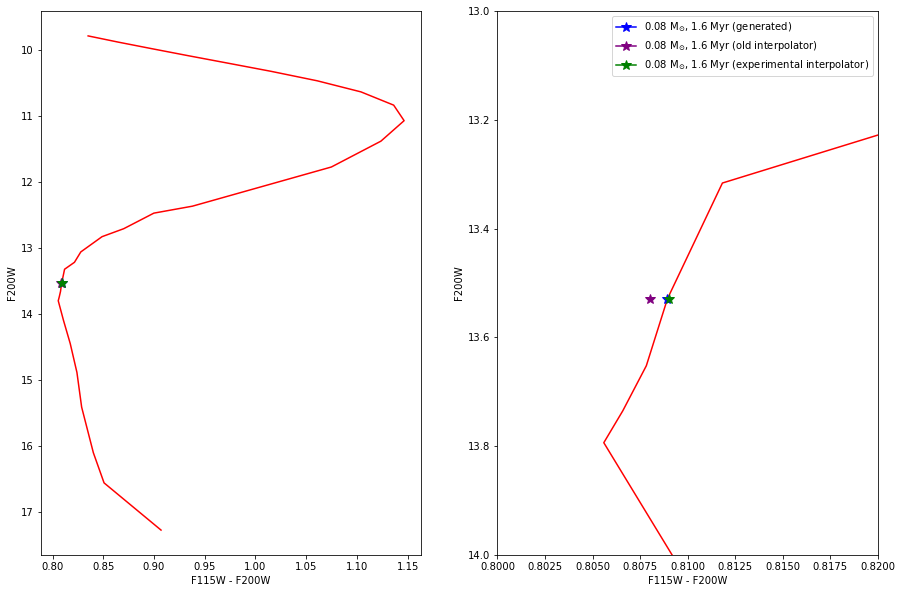

In [66]:
mass = 0.08
level_age = 1.6e6
log_age = np.log10(level_age)
level_age_myr = level_age / 1e6

star_old_m0p08 = interpolator_old.interpolate(level_age_myr, mass, instances, log_age_arr, filters)
star_exp_m0p08 = interpolator_exp.interpolate(level_age_myr, mass, instances, log_age_arr, filters, filter_zero_points)

fig, axes = py.subplots(figsize=(15, 10))

py.subplot(1, 2, 1)
py.plot(iso1p6.points[filters[0]] - iso1p6.points[filters[1]], iso1p6.points[filters[1]], color='red')

idx = np.where( abs(iso1p6.points['mass'] - 0.08) == min(abs(iso1p6.points['mass'] - 0.08)) )[0]
py.plot(iso1p6.points[idx][filters[0]] - iso1p6.points[idx][filters[1]], iso1p6.points[idx][filters[1]], marker="*",
       color="b", markersize=10, label="0.2 M$_{\odot}$, 1.6 Myr (generated)")

py.plot(star_old_m0p08[3]-star_old_m0p08[4], star_old_m0p08[4], marker='*', color='purple', 
        markersize=10, label='0.08 M$_{\odot}$, 1.6 Myr (old interpolator)')
py.plot(star_exp_m0p08[3]-star_exp_m0p08[4], star_exp_m0p08[4], marker='*', color='g', 
        markersize=10, label='0.08 M$_{\odot}$, 1.6 Myr (experimental interpolator)')

py.xlabel('F115W - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()

py.subplot(1, 2, 2)
py.plot(iso1p6.points[filters[0]] - iso1p6.points[filters[1]], iso1p6.points[filters[1]], color='red')

idx = np.where( abs(iso1p6.points['mass'] - 0.08) == min(abs(iso1p6.points['mass'] - 0.08)) )[0]
py.plot(iso1p6.points[idx][filters[0]] - iso1p6.points[idx][filters[1]], iso1p6.points[idx][filters[1]], marker="*",
       color="b", markersize=10, label="0.08 M$_{\odot}$, 1.6 Myr (generated)")

py.plot(star_old_m0p08[3]-star_old_m0p08[4], star_old_m0p08[4], marker='*', color='purple', 
        markersize=10, label='0.08 M$_{\odot}$, 1.6 Myr (old interpolator)')
py.plot(star_exp_m0p08[3]-star_exp_m0p08[4], star_exp_m0p08[4], marker='*', color='g', 
        markersize=10, label='0.08 M$_{\odot}$, 1.6 Myr (experimental interpolator)')

py.xlabel('F115W - F200W')
py.ylabel('F200W')

py.xlim(0.8, 0.82)
py.ylim(13, 14)
py.gca().invert_yaxis()

py.legend()

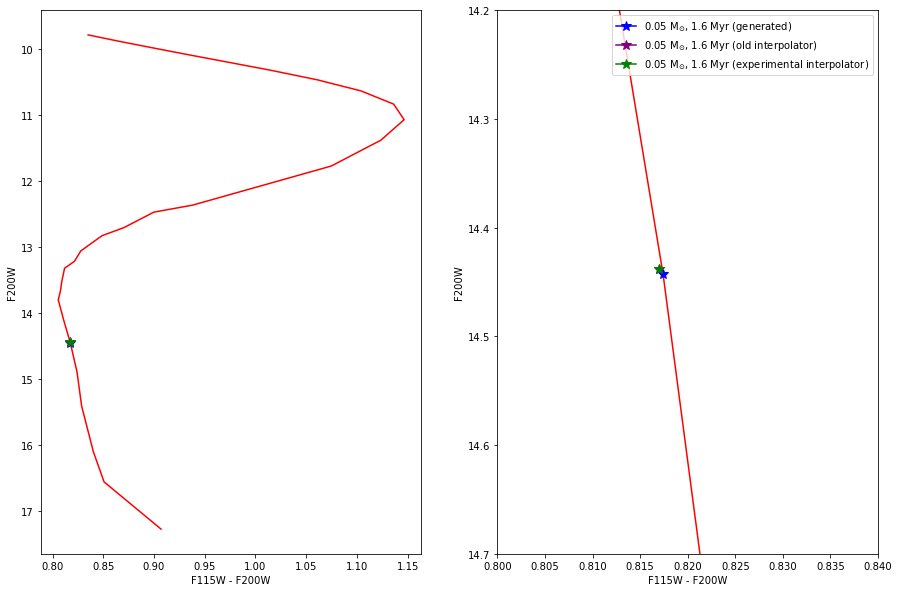

In [81]:
mass = 0.05
level_age = 1.6e6
log_age = np.log10(level_age)
level_age_myr = level_age / 1e6

star_old_m0p05 = interpolator_old.interpolate(level_age_myr, mass, instances, log_age_arr, filters)
star_exp_m0p05 = interpolator_exp.interpolate(level_age_myr, mass, instances, log_age_arr, filters, filter_zero_points)

fig, axes = py.subplots(figsize=(15, 10))

py.subplot(1, 2, 1)
py.plot(iso1p6.points[filters[0]] - iso1p6.points[filters[1]], iso1p6.points[filters[1]], color='red')

idx = np.where( abs(iso1p6.points['mass'] - 0.05) == min(abs(iso1p6.points['mass'] - 0.05)) )[0]
py.plot(iso1p6.points[idx][filters[0]] - iso1p6.points[idx][filters[1]], iso1p6.points[idx][filters[1]], marker="*",
       color="b", markersize=10, label="0.5 M$_{\odot}$, 1.6 Myr (generated)")

py.plot(star_old_m0p05[3]-star_old_m0p05[4], star_old_m0p05[4], marker='*', color='purple', 
        markersize=10, label='0.05 M$_{\odot}$, 1.6 Myr (old interpolator)')
py.plot(star_exp_m0p05[3]-star_exp_m0p05[4], star_exp_m0p05[4], marker='*', color='g', 
        markersize=10, label='0.05 M$_{\odot}$, 1.6 Myr (experimental interpolator)')

py.xlabel('F115W - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()

py.subplot(1, 2, 2)
py.plot(iso1p6.points[filters[0]] - iso1p6.points[filters[1]], iso1p6.points[filters[1]], color='red')

idx = np.where( abs(iso1p6.points['mass'] - 0.05) == min(abs(iso1p6.points['mass'] - 0.05)) )[0]
py.plot(iso1p6.points[idx][filters[0]] - iso1p6.points[idx][filters[1]], iso1p6.points[idx][filters[1]], marker="*",
       color="b", markersize=10, label="0.05 M$_{\odot}$, 1.6 Myr (generated)")

py.plot(star_old_m0p05[3]-star_old_m0p05[4], star_old_m0p05[4], marker='*', color='purple', 
        markersize=10, label='0.05 M$_{\odot}$, 1.6 Myr (old interpolator)')
py.plot(star_exp_m0p05[3]-star_exp_m0p05[4], star_exp_m0p05[4], marker='*', color='g', 
        markersize=10, label='0.05 M$_{\odot}$, 1.6 Myr (experimental interpolator)')

py.xlabel('F115W - F200W')
py.ylabel('F200W')

py.xlim(0.80, 0.84)
py.ylim(14.2, 14.7)
py.gca().invert_yaxis()

py.legend()

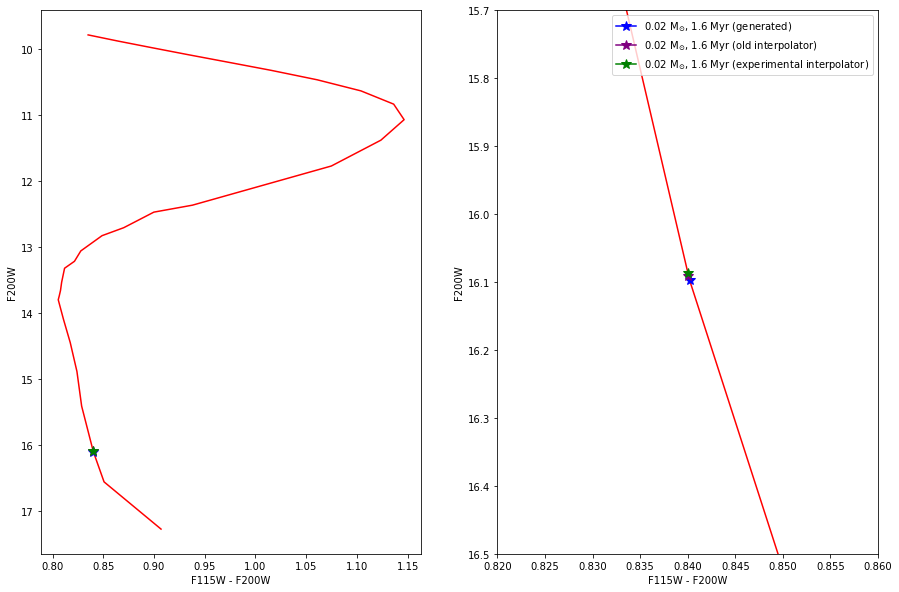

In [70]:
mass = 0.02
level_age = 1.6e6
log_age = np.log10(level_age)
level_age_myr = level_age / 1e6

star_old_m0p02 = interpolator_old.interpolate(level_age_myr, mass, instances, log_age_arr, filters)
star_exp_m0p02 = interpolator_exp.interpolate(level_age_myr, mass, instances, log_age_arr, filters, filter_zero_points)

fig, axes = py.subplots(figsize=(15, 10))

py.subplot(1, 2, 1)
py.plot(iso1p6.points[filters[0]] - iso1p6.points[filters[1]], iso1p6.points[filters[1]], color='red')

idx = np.where( abs(iso1p6.points['mass'] - 0.02) == min(abs(iso1p6.points['mass'] - 0.02)) )[0]
py.plot(iso1p6.points[idx][filters[0]] - iso1p6.points[idx][filters[1]], iso1p6.points[idx][filters[1]], marker="*",
       color="b", markersize=10, label="0.5 M$_{\odot}$, 1.6 Myr (generated)")

py.plot(star_old_m0p02[3]-star_old_m0p02[4], star_old_m0p02[4], marker='*', color='purple', 
        markersize=10, label='0.5 M$_{\odot}$, 1.6 Myr (old interpolator)')
py.plot(star_exp_m0p02[3]-star_exp_m0p02[4], star_exp_m0p02[4], marker='*', color='g', 
        markersize=10, label='0.5 M$_{\odot}$, 1.6 Myr (experimental interpolator)')

py.xlabel('F115W - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()

py.subplot(1, 2, 2)
py.plot(iso1p6.points[filters[0]] - iso1p6.points[filters[1]], iso1p6.points[filters[1]], color='red')

idx = np.where( abs(iso1p6.points['mass'] - 0.02) == min(abs(iso1p6.points['mass'] - 0.02)) )[0]
py.plot(iso1p6.points[idx][filters[0]] - iso1p6.points[idx][filters[1]], iso1p6.points[idx][filters[1]], marker="*",
       color="b", markersize=10, label="0.02 M$_{\odot}$, 1.6 Myr (generated)")

py.plot(star_old_m0p02[3]-star_old_m0p02[4], star_old_m0p02[4], marker='*', color='purple', 
        markersize=10, label='0.02 M$_{\odot}$, 1.6 Myr (old interpolator)')
py.plot(star_exp_m0p02[3]-star_exp_m0p02[4], star_exp_m0p02[4], marker='*', color='g', 
        markersize=10, label='0.02 M$_{\odot}$, 1.6 Myr (experimental interpolator)')

py.xlabel('F115W - F200W')
py.ylabel('F200W')

py.xlim(0.82, 0.86)
py.ylim(15.7, 16.5)
py.gca().invert_yaxis()

py.legend()